### CASA0002_Urban simulation
# Introduction to networks
---

Elsa Arcaute, Valentina Marin 

February 2022



#### This code will show you some basic network manipulations:
* how to create a graph
* how to create the edge list and the adjacency matrix for undirected, directed, weighted and unweighted networks
* compute the degree of nodes, the shortest path and the diameter


In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Create graphs:

The following four basic graph types are provided in NetworkX [1]:

* __Graph__: undirected graph.It ignores multiple edges between two nodes. It does allow self-loop
edges between a node and itself.
* __DiGraph__: directed graph.
* __MultiGraph__: A flexible graph class that allows multiple undirected edges between pairs of nodes.
* __MultiDiGraph__: A directed version of a MultiGraph.
    
    
    
    
|NetworkxClass|Typee|Self-Loops allowed|parallel edges allowed|
|:-----------:|:---:|:----------------:|:--------------------:|
|Graph|Undirected|Yes|No|
|DiGraph|Directed|Yes|No|
|MultiGraph|Undirected|Yes|Yes|
|MultiDiGraph|Directed|Yes|Yes|

In [2]:
# different graph types can be created with:

# G = nx.Graph()
# G = nx.DiGraph()
# G = nx.MultiGraph()
# G = nx.MultiDiGraph()


###  1. Create a Graph from edge list:

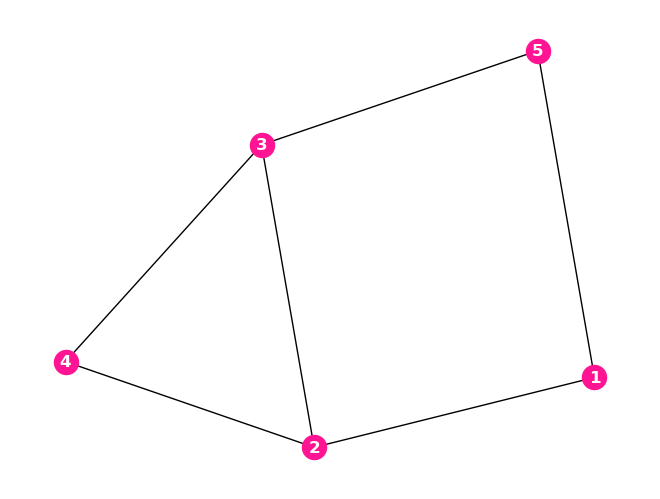

In [3]:
#make an empty graph
g1=nx.Graph()

#add edges linking nodes:
g1.add_edges_from([(1, 2), (2, 3), (2,4), (3,4), (3,5), (1,5)])

#plot the graph
nx.draw(g1,
        with_labels = True,
        node_color='deeppink',
        font_color="white",
        font_weight='bold')

In [4]:
#now let us add an edge to create the example from Newman's book
g1.add_edges_from([(3,6)])


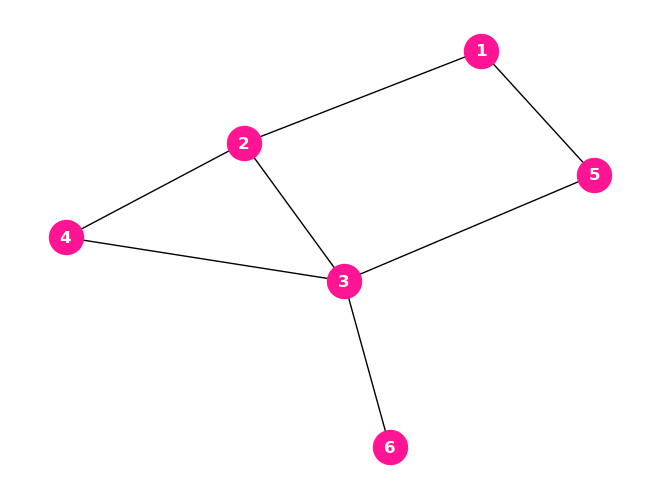

In [5]:
#plot the graph
nx.draw(g1,
        with_labels = True,
        node_color='deeppink',
        node_size=600,
        font_color="white",
        font_weight='bold')
# if you run this command many times, you will how the configuration changes
#without changing the links between nodes

__Examine graph components:__

In [6]:
# Print information about the Graph
print(g1)

Graph with 6 nodes and 7 edges


In [7]:
g1.number_of_nodes()  

6

In [8]:
g1.number_of_edges()

7

In [9]:
# get name of vertices (nodes)
list(g1.nodes)

# Other ways to do it:
# list(g1)
# [n for n in g1]  #(Iterates over all nodes in the graph) 


[1, 2, 3, 4, 5, 6]

In [10]:
# get edge relations ~ edge list
list(g1.edges)

# Other way to do it:
# [e for e in g1.edges][0:10]  #(Iterates over all edges in the graph) 

[(1, 2), (1, 5), (2, 3), (2, 4), (3, 4), (3, 5), (3, 6)]

In [11]:
# get adjacency matrix
adj_A1 = nx.adjacency_matrix(g1)
print(adj_A1.todense())

[[0 1 0 0 1 0]
 [1 0 1 1 0 0]
 [0 1 0 1 1 1]
 [0 1 1 0 0 0]
 [1 0 1 0 0 0]
 [0 0 1 0 0 0]]


In [12]:
# Note that in the previous code we used ".todense" when printing the matrix.
# This is because nx.adjacency_matrix() does not return a 2-dimensional array if the matrix is sparse
# A sparse matrix is a matrix that contains many 0 values
# Look at what happens if we do not use ".todense" :

print(adj_A1)

<Compressed Sparse Row sparse array of dtype 'int64'
	with 14 stored elements and shape (6, 6)>
  Coords	Values
  (0, 1)	1
  (0, 4)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (2, 1)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (3, 1)	1
  (3, 2)	1
  (4, 0)	1
  (4, 2)	1
  (5, 2)	1


In [13]:
# adjacent vertices of node "2"
list(g1.adj[2]) 

[1, 3, 4]

In [14]:
#degree for each node
deg=nx.degree(g1)
deg

DegreeView({1: 2, 2: 3, 3: 4, 4: 2, 5: 2, 6: 1})

In [15]:
g1.degree[4]  # the number of edges incident to 4

2

In [16]:
#diameter of network
nx.diameter(g1)

3

In [17]:
# shortest path from 1 to 6
sh_path_nodes = nx.shortest_path(g1,source=1,target=6)
print(sh_path_nodes)



[1, 2, 3, 6]


In [18]:
sh_path_edges = list(zip(sh_path_nodes,sh_path_nodes[1:]))
print(sh_path_edges)

[(1, 2), (2, 3), (3, 6)]


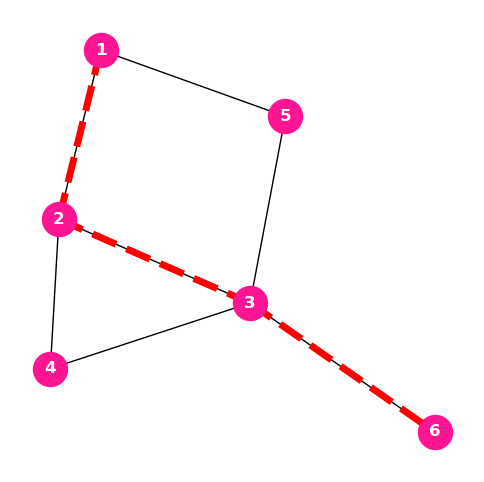

In [19]:
# Let us plot shortest path

pos = nx.spring_layout(g1)
fig,ax=plt.subplots(1,1,figsize=(6,6))
nx.draw(g1,
        pos = pos,
        with_labels = True,
        node_color='deeppink',
        node_size=600,
        font_color="white",
        font_weight='bold')
        

nx.draw_networkx_edges(g1,pos=pos,edgelist=sh_path_edges,edge_color='red',style="dashed", width=5)
plt.show()

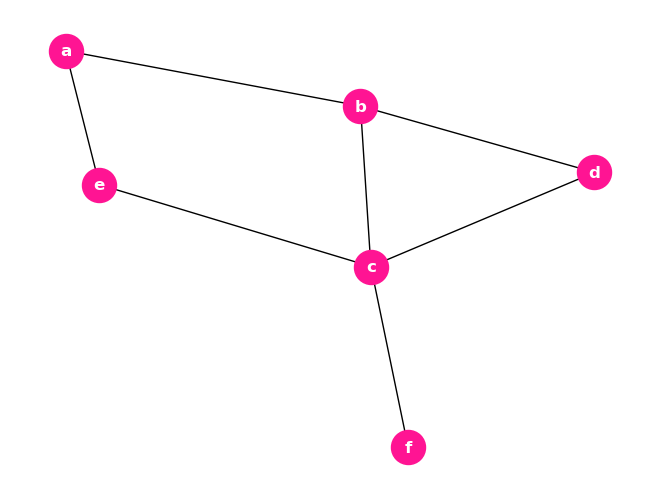

In [20]:
#reproduce the same example using letters instead of numbers
g1l=nx.Graph()
g1l.add_edges_from([('a', 'b'), ('b', 'c'), ('b','d'), ('c','d'), ('c','e'), ('a','e'), ('c','f')])

#plot the graph

nx.draw(g1l,
        with_labels = True,
        node_color='deeppink',
        node_size=600,
        font_color="white",
        font_weight='bold')

In [21]:
# get the name of vertices (nodes)
list(g1l.nodes)

['a', 'b', 'c', 'd', 'e', 'f']

In [22]:
# get edge relations ~ edge list
list(g1l.edges)

[('a', 'b'),
 ('a', 'e'),
 ('b', 'c'),
 ('b', 'd'),
 ('c', 'd'),
 ('c', 'e'),
 ('c', 'f')]

In [23]:
#degree for each node
deg=nx.degree(g1l)
deg


DegreeView({'a': 2, 'b': 3, 'c': 4, 'd': 2, 'e': 2, 'f': 1})

In [24]:
#diameter of network
nx.diameter(g1l)

3

### 2. Create a MultiGraph from an edge list:

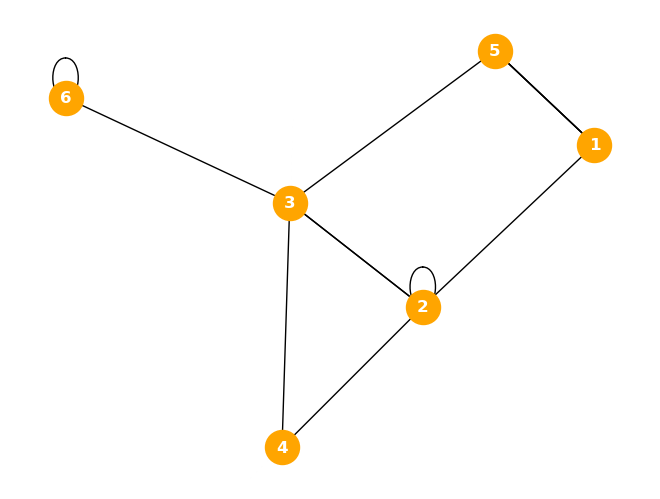

In [25]:
# create network with multi-edges and self-edges
g2=nx.MultiGraph()
g2.add_edges_from([(1,2), (2,2), (2,3), (2,3), (2,4), (3,4), (3,5), (1,5), (1,5), (5,1), (3,6), (6,6)])

#plot the graph
nx.draw(g2,
        with_labels = True,
        node_color='orange',
        node_size=600,
        font_color="white",
        font_weight='bold')


In [26]:
# get the name of vertices (nodes)
list(g2.nodes)

[1, 2, 3, 4, 5, 6]

In [27]:
# get edge relations ~ edge list
list(g2.edges)

# Note that the third value gives us a count of the edges between pair of nodes. 
# !!! Remember that in python the count starts with 0, so these 0s here represent the first edges.

[(1, 2, 0),
 (1, 5, 0),
 (1, 5, 1),
 (1, 5, 2),
 (2, 2, 0),
 (2, 3, 0),
 (2, 3, 1),
 (2, 4, 0),
 (3, 4, 0),
 (3, 5, 0),
 (3, 6, 0),
 (6, 6, 0)]

In [28]:
g2.number_of_edges()

12

In [29]:
g2.number_of_edges(1,5)

3

In [30]:
g2.number_of_edges(1,2)

1

In [31]:
g2.number_of_edges(2,2)

1

In [32]:
sl=nx.number_of_selfloops(g2)
print(sl)

2


In [33]:
list(nx.selfloop_edges(g2))

[(2, 2), (6, 6)]

In [34]:
# get adjacency matrix

adj_A2 = nx.adjacency_matrix(g2)
print(adj_A2.todense())

[[0 1 0 0 3 0]
 [1 1 2 1 0 0]
 [0 2 0 1 1 1]
 [0 1 1 0 0 0]
 [3 0 1 0 0 0]
 [0 0 1 0 0 1]]


In [35]:
#degree for each node
deg=nx.degree(g2)
deg


#!!! warning for loops!!!!!!
#The adjacency matrix does NOT need a 2 for the loop only for the theoretical computation
#compare the result for degree with k_i=sum_j(A_ij)

MultiDegreeView({1: 4, 2: 6, 3: 5, 4: 2, 5: 4, 6: 3})

In [36]:
#diameter of network
nx.diameter(g2)

3

### 3. Create a MultiGraph from an adjacency matrix:

In [74]:
import numpy as np

#let us create the network from the adjacency matrix
adj_A=np.array([[0,1,0,0,3,0],
            [1,1,2,1,0,0],
            [0,2,0,1,1,1],
            [0,1,1,0,0,0],
            [3,0,1,0,0,0],
            [0,0,1,0,0,1],])
print(adj_A)

[[0 1 0 0 3 0]
 [1 1 2 1 0 0]
 [0 2 0 1 1 1]
 [0 1 1 0 0 0]
 [3 0 1 0 0 0]
 [0 0 1 0 0 1]]


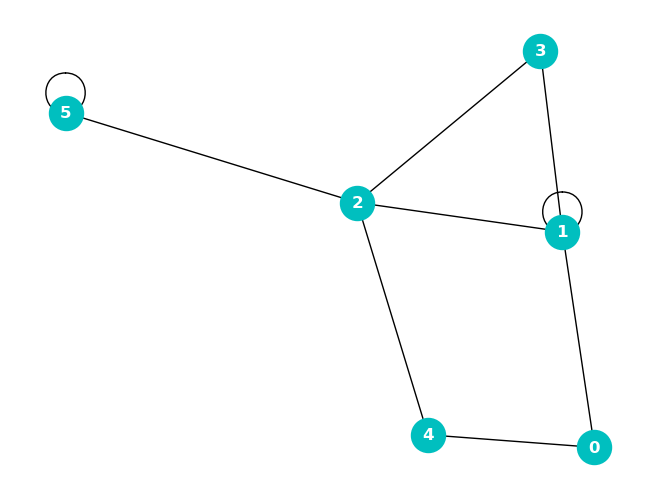

In [75]:
#use this matrix to create the network
g3 = nx.MultiGraph(np.array(adj_A))

#plot the graph
nx.draw(g3,
        with_labels = True,
        node_color='c',
        node_size=600,
        font_color="white",
        font_weight='bold')

In [76]:
# get the name of vertices (nodes)
list(g3.nodes)

[0, 1, 2, 3, 4, 5]

In [77]:
# rename vertices
labels={0:1, 1:2, 2:3, 3:4, 4:5, 5:6}
g3 = nx.relabel_nodes(g3, labels)


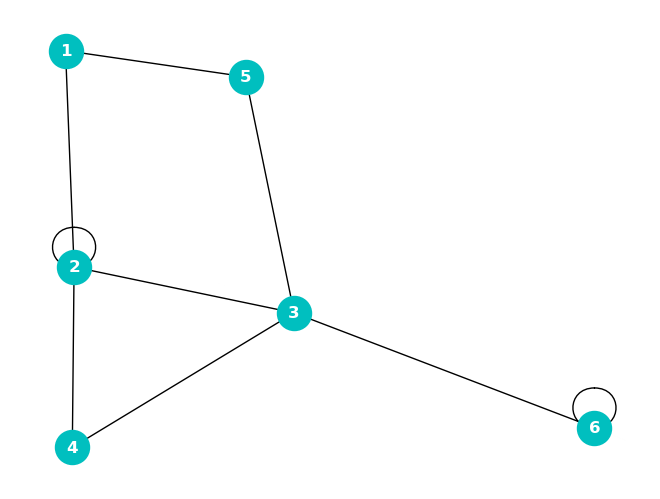

In [78]:
#plot the graph
nx.draw(g3,
        with_labels = True,
        node_color='c',
        node_size=600,
        font_color="white",
        font_weight='bold')

In [79]:
# get the name of vertices (nodes)
list(g3.nodes)


[1, 2, 3, 4, 5, 6]

In [80]:
# get edge relations ~ edge list
list(g3.edges)

[(1, 2, 0),
 (1, 5, 0),
 (2, 2, 0),
 (2, 3, 0),
 (2, 4, 0),
 (3, 4, 0),
 (3, 5, 0),
 (3, 6, 0),
 (6, 6, 0)]

In [81]:
# We can ask for the list of edges containing the attribute data that every edge holds.
list(g3.edges(data = True))

# Remember that here we are looking at a MultiGraph, so we can have multiple edges between the same pair of nodes.
# In this case each edge weigtht is 1.

[(1, 2, {'weight': 1}),
 (1, 5, {'weight': 3}),
 (2, 2, {'weight': 1}),
 (2, 3, {'weight': 2}),
 (2, 4, {'weight': 1}),
 (3, 4, {'weight': 1}),
 (3, 5, {'weight': 1}),
 (3, 6, {'weight': 1}),
 (6, 6, {'weight': 1})]

In [82]:
g3.number_of_edges()

9

In [83]:
sl=nx.number_of_selfloops(g3)
print(sl)

2


In [84]:
list(nx.selfloop_edges(g3))

[(2, 2), (6, 6)]

In [85]:
g3.number_of_edges(1,5)

1

In [86]:
# get adjacency matrix

adj_A3 = nx.adjacency_matrix(g3)
print(adj_A3.todense())

[[0 1 0 0 3 0]
 [1 1 2 1 0 0]
 [0 2 0 1 1 1]
 [0 1 1 0 0 0]
 [3 0 1 0 0 0]
 [0 0 1 0 0 1]]


In [87]:
#degree for each node
deg=nx.degree(g3)
deg
#see that if set 2 for loops will get wrong degree

MultiDegreeView({1: 2, 2: 5, 3: 4, 4: 2, 5: 2, 6: 3})

In [88]:
#diameter of network
nx.diameter(g3)

3

### 4. Create a weighted Graph from an adjacency matrix:

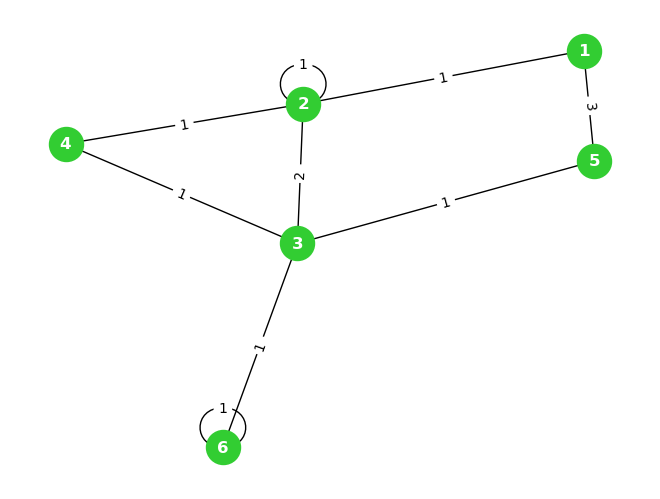

In [89]:
# use same adjacency matrix to create a weighted graph
g4 = nx.Graph(np.array(adj_A))


#plot network with weights
labels={0:1, 1:2, 2:3, 3:4, 4:5, 5:6}
g4 = nx.relabel_nodes(g4, labels)

label_weight = nx.get_edge_attributes(g4, "weight")
pos = nx.spring_layout(g4)
nx.draw(g4,
        pos,
        with_labels = True,
        node_color='limegreen',
        node_size=600,
        font_color="white",
        font_weight='bold')


nx.draw_networkx_edge_labels(g4,pos=pos,edge_labels=label_weight)
plt.show()


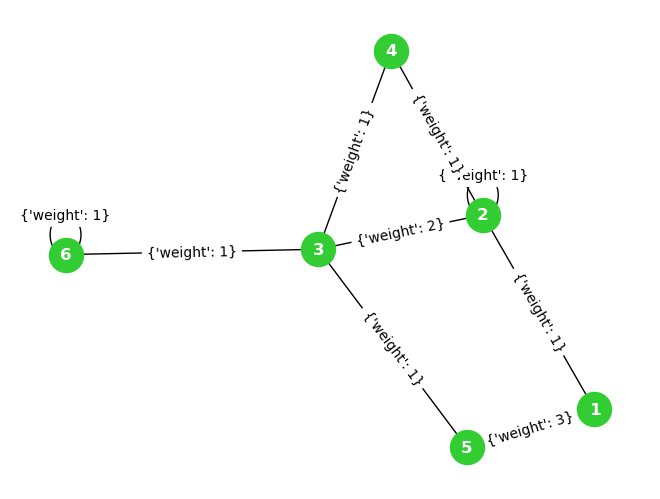

In [90]:
#plot network with weights as dictionary
pos = nx.spring_layout(g4)
nx.draw(g4,
        pos,
        with_labels = True,
        node_color='limegreen',
        node_size=600,
        font_color="white",
        font_weight='bold')

nx.draw_networkx_edge_labels(g4,pos=pos)
plt.show()

In [91]:
# Print edge list with attributes
list(g4.edges(data = True))

# Print edge list with attributes
#list(g4.edges.data())[0:10]

[(1, 2, {'weight': 1}),
 (1, 5, {'weight': 3}),
 (2, 2, {'weight': 1}),
 (2, 3, {'weight': 2}),
 (2, 4, {'weight': 1}),
 (3, 4, {'weight': 1}),
 (3, 5, {'weight': 1}),
 (3, 6, {'weight': 1}),
 (6, 6, {'weight': 1})]

In [92]:
# To check an specific edge data attribute:
print(g4.edges[1,5]['weight'])

# To check edge data attributes:
# print(g4[1][5]['weight'])

3


In [93]:
g4.number_of_edges(1,5)

1

In [94]:
# get adjacency matrix
adj_A4 = nx.adjacency_matrix(g4)
print(adj_A4.todense())
#by default it gives us the weighted adjancency matrix

[[0 1 0 0 3 0]
 [1 1 2 1 0 0]
 [0 2 0 1 1 1]
 [0 1 1 0 0 0]
 [3 0 1 0 0 0]
 [0 0 1 0 0 1]]


In [95]:
# get adjacency matrix
adj_A4 = nx.adjacency_matrix(g4,weight=None)
print(adj_A4.todense())

#by turning of the weight we just see the topological structure in the adjacency matrix

[[0 1 0 0 1 0]
 [1 1 1 1 0 0]
 [0 1 0 1 1 1]
 [0 1 1 0 0 0]
 [1 0 1 0 0 0]
 [0 0 1 0 0 1]]


In [96]:
# degree for each node
#!!!! degree for each node when network is weighted needs a different function!!!!!
deg=nx.degree(g4)
deg

# This one is counting the number of links going in and out a node, where self-loops counts as 2.

DegreeView({1: 2, 2: 5, 3: 4, 4: 2, 5: 2, 6: 3})

In [97]:
#If we want to consider the weight of a link into the degree, we need to calculate the node strength:
deg=nx.degree(g4, weight="weight")
deg

DegreeView({1: 4, 2: 6, 3: 5, 4: 2, 5: 4, 6: 3})

In [98]:
#topological diameter without weights:
nx.diameter(g4)

3

In [99]:
# If we want the diameter of the network considering the weights, we need to use a trick.
# This, beacuse nx.diameter does not include this function, so we need to do :
nlen={}

for n in g4.nodes():
    a=nx.single_source_dijkstra_path_length(g4, n)
    print(a)
    nlen[n]=a
e = nx.eccentricity(g4,sp=nlen)
d = nx.diameter(g4, e)
d

# We first run nx.single_source_dijkstra_path_length() which computes the shortest path length between a node and every other reachable node, considering the weigths of the links.
# Then we compute the eccentricity of each node, which is the maximum distance from each node to all other nodes, considering "nlen" which are the weighted distances.
# Then we compute the diameter, which is basically the maximum eccentricity in the graph.

{1: 0, 2: 1, 4: 2, 5: 3, 3: 3, 6: 4}
{2: 0, 1: 1, 4: 1, 3: 2, 5: 3, 6: 3}
{3: 0, 4: 1, 5: 1, 6: 1, 2: 2, 1: 3}
{4: 0, 2: 1, 3: 1, 1: 2, 5: 2, 6: 2}
{5: 0, 3: 1, 4: 2, 6: 2, 1: 3, 2: 3}
{6: 0, 3: 1, 4: 2, 5: 2, 2: 3, 1: 4}


4

### 5. Create a directed DiGraph from an edges list:

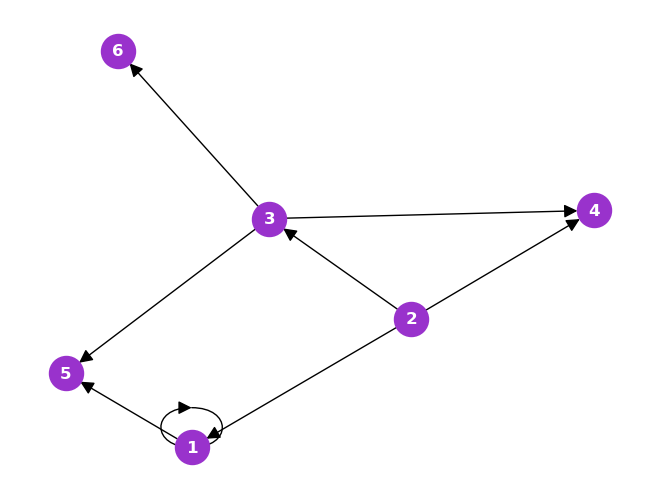

In [100]:
# construct a direct network:
g5=nx.DiGraph()
g5.add_edges_from([(1,1), (2,1), (2,3), (2,4), (3,4), (3,5), (1,5), (3,6)])

#plot the graph

pos = nx.spring_layout(g4)
nx.draw(g5,
        pos,
        with_labels = True,
        node_color='darkorchid',
        node_size=600,
        font_color="white",
        font_weight='bold',
       arrowsize=20)

In [101]:
# get edge relations ~ edge list
list(g5.edges)

[(1, 1), (1, 5), (2, 1), (2, 3), (2, 4), (3, 4), (3, 5), (3, 6)]

In [102]:
# get adjacency matrix

adj_A5 = nx.adjacency_matrix(g5)
print(adj_A5.todense())

#!!!!! Note that A_ij=1 if there's a link from i to j instead of from j to i as in Newman's book

[[1 0 0 0 1 0]
 [1 0 1 1 0 0]
 [0 0 0 1 1 1]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


In [103]:
#in and out degrees
g5.in_degree()


InDegreeView({1: 2, 2: 0, 3: 1, 4: 2, 5: 2, 6: 1})

In [104]:
g5.out_degree()

OutDegreeView({1: 2, 2: 3, 3: 3, 4: 0, 5: 0, 6: 0})

In [105]:
#diameter of undirected network
d1=nx.diameter(g5.to_undirected())
d1


3

In [106]:
d1=nx.diameter(g5)
# This code will give us an error "Found infinite path length because the digraph is not strongly connected"
# This is because in this network not every node is reachable

NetworkXError: Found infinite path length because the digraph is not strongly connected

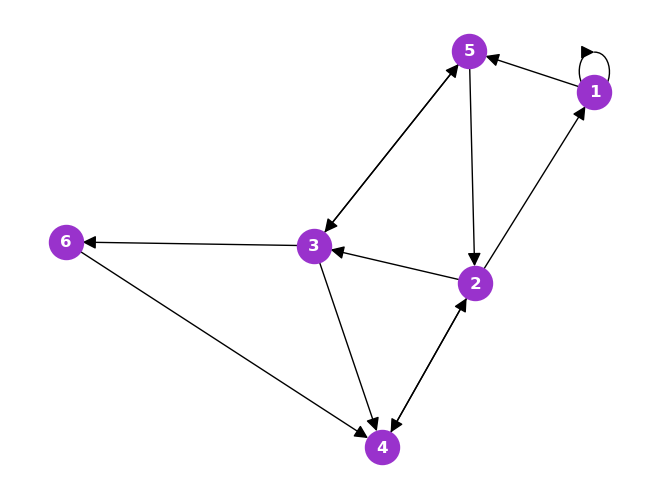

In [107]:
# Here we create another directed network where every node is reachable, so we can calculate the diameter:

g5_2=nx.DiGraph()
g5_2.add_edges_from([(1,1), (2,1), (2,3), (2,4), (4,2), (3,4), (3,5),(5,3), (1,5), (5,2),(3,6),(6,4)])

#plot the graph

pos = nx.spring_layout(g4)
nx.draw(g5_2,
        pos,
        with_labels = True,
        node_color='darkorchid',
        node_size=600,
        font_color="white",
        font_weight='bold',
       arrowsize=20)

In [108]:
#measure the diameter of the modified directed network:
d_2=nx.diameter(g5_2)
d_2

4

# Weighted graphs exercise:

The purpose of the following exercises is to better understand the relationships in the network and the meaning of the weights in different types of networks. We are going to start by creating a weighted graph from a data frame and then compute some measures.

### Let's create a network first:

In [109]:
# Create dataframe for edges given nodes and weigths: 
import pandas as pd

DF_edges = pd.DataFrame([['b', 'a','60'],
 ['a', 'c','50'],
 ['a', 'd','100'],
 ['a', 'e','80'],
 ['a', 'g','70'],
 ['b', 'c','20'],
 ['g', 'i','70'],
 ['g', 'c','40'],
 ['h', 'i','20'],
 ['i', 'd','60'],
 ['i', 'j','60'],
 ['d', 'e','5'],
 ['e', 'k','10'],
 ['f', 'l','50'],
 ['f', 'k','25'],
 ['j', 'k','80']],
columns=['node1', 'node2','weight'])

DF_edges["weight"] = DF_edges["weight"].astype(str).astype(float)

DF_edges

,node1,node2,weight
0,b,a,60.0
1,a,c,50.0
2,a,d,100.0
3,a,e,80.0
4,a,g,70.0
5,b,c,20.0
6,g,i,70.0
7,g,c,40.0
8,h,i,20.0
9,i,d,60.0


/opt/anaconda3/envs/urbsim/lib/python3.12/site-packages/networkx/drawing/nx_pylab.py:315: UserWarning: 

The arrowsize keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)


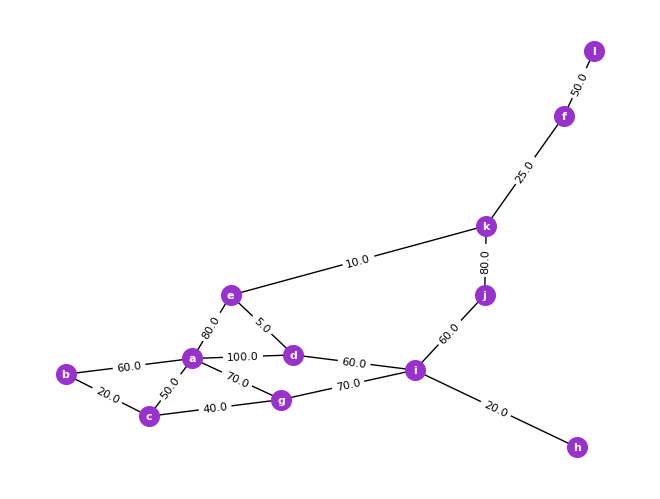

In [110]:
# Create graph from a dataframe:

DF_graph=nx.Graph()
DF_graph = nx.from_pandas_edgelist(DF_edges, 'node1', 'node2', ['weight'])

pos = nx.spring_layout(DF_graph)
label_weight = nx.get_edge_attributes(DF_graph, "weight")
nx.draw(DF_graph,
        pos,
        with_labels = True,
        node_color='darkorchid',
        node_size=200,
        font_color="white",
        font_weight='bold',
        font_size=8,
        arrowsize=20)
nx.draw_networkx_edge_labels(DF_graph,pos=pos,edge_labels=label_weight,font_size=8)
plt.show()


In [111]:
# Find the max weight value
DF_edges.iloc[DF_edges['weight'].idxmax()]

node1         a
node2         d
weight    100.0
Name: 2, dtype: object

In [112]:
# Find the min weight value
DF_edges.iloc[DF_edges['weight'].idxmin()]

node1       d
node2       e
weight    5.0
Name: 11, dtype: object

## Which are the closest nodes?

According to the min and max values, is node "d" closer to node "a" or node "e"?
Well the answer depends on the type of network and what "weight" is representing in each case:

* Let's imagine that "DF_graph" is a __street network__, where nodes represent intersections, links are the streets, and the weights of the links represent the length in meters for each of the street segment.
In this case, __node "d" is closer to node "e"__, because the distance between them is just 5 meters, so these intersections are "closer".

* Let's imagine that "DF_graph" is an __email network__, where nodes represent students, links exist if emails exist between them and the weight of the link represents the number of total emails that have been exchanged.
In this case, __node "d" is closer to node "a"__, because they exchange the maximum number of emails, so we can infer that their relationship is "closer", since it is more intense.


## How should we compute the weighted shortest path?

### Shortest path if it is a Street Network:
Let's find the route for walking less meters between intersection "node b" and intersection "node g". 


In this case, the lower the weight value (street length), the shorter the distance in meters. So, we will use 'weight' column to calculate the shortest path.

In [113]:
# shortest path from b to g
street_sh_path_nodes = nx.shortest_path(DF_graph,source="b",target="g",weight='weight')
print(street_sh_path_nodes)
street_sh_path_edges = list(zip(street_sh_path_nodes,street_sh_path_nodes[1:]))
print(street_sh_path_edges)

['b', 'c', 'g']
[('b', 'c'), ('c', 'g')]


### Shortest path in the Email Network:
We need to find the shortest path for spreading information from student "node b" to student "node g". 

Contrary to the previous case, here the higher weight (interaction) between two people, the closer they are to each other. So, we need to invert the weights of the edges to calculate the shortest path, and create a new column 'inv_weights'.

In [79]:
# Inverse weights:
inv_weights={(e1, e2):round(1./weight,7) for e1, e2, weight in DF_graph.edges(data='weight')}

# Let us add the inversed weight as an attribute to the edges in the graph
nx.set_edge_attributes(DF_graph, inv_weights, 'inv_weights')

# Print edge list with attributes
list(DF_graph.edges(data = True))[0:15]

[('b', 'a', {'weight': 60.0, 'inv_weights': 0.0166667}),
 ('b', 'c', {'weight': 20.0, 'inv_weights': 0.05}),
 ('a', 'c', {'weight': 50.0, 'inv_weights': 0.02}),
 ('a', 'd', {'weight': 100.0, 'inv_weights': 0.01}),
 ('a', 'e', {'weight': 80.0, 'inv_weights': 0.0125}),
 ('a', 'g', {'weight': 70.0, 'inv_weights': 0.0142857}),
 ('c', 'g', {'weight': 40.0, 'inv_weights': 0.025}),
 ('d', 'i', {'weight': 60.0, 'inv_weights': 0.0166667}),
 ('d', 'e', {'weight': 5.0, 'inv_weights': 0.2}),
 ('e', 'k', {'weight': 10.0, 'inv_weights': 0.1}),
 ('g', 'i', {'weight': 70.0, 'inv_weights': 0.0142857}),
 ('i', 'h', {'weight': 20.0, 'inv_weights': 0.05}),
 ('i', 'j', {'weight': 60.0, 'inv_weights': 0.0166667}),
 ('j', 'k', {'weight': 80.0, 'inv_weights': 0.0125}),
 ('k', 'f', {'weight': 25.0, 'inv_weights': 0.04})]

In [114]:
# shortest path from b to g
email_sh_path_nodes = nx.shortest_path(DF_graph,source="b",target="g", weight='inv_weights')
print(email_sh_path_nodes)

email_sh_path_edges = list(zip(email_sh_path_nodes,email_sh_path_nodes[1:]))
print(email_sh_path_edges)

['b', 'a', 'g']
[('b', 'a'), ('a', 'g')]


## QUIZ:

#### Using "DF_graph" as a base, imagine that it represents the following networks, and for each case compute:


* __If  "DF_graph" is an airport network, where nodes represent airports, and the weight of the links is the normalised average flight time between them.__ 1) Find the aiports within the fastest route between the two less connected aiports.

* __If  "DF_graph" is a social network, where nodes represent people, and the weight of the links is the total number of calls between them.__ 2)  Who are the people within the channel of communication that would transfer the information faster between the two with the higher number of contacts?


* __If we have the same social network, but in this case the weight of the links is the distance in kilometers of where people live.__ 3) First find the total distance between the people that would spread the information faster between the two with the higher number of contacts. 4) Then find the shortest distance between the two most distant people in the network. 


* __If "DF_graph" is a trade network, where nodes represent countries  and the weight of links is the ammount of good exchange.__ 5) Find the countries that trade the higher and the lower number of goods.

## Explore classic networks:
You can generate some classic graphs [2] to practice and see how different measures change across diferent networks. 
Here we are adding some. To see more examples go to: https://networkx.org/documentation/stable/reference/generators.html 

### Zachary’s Karate Club graph: 

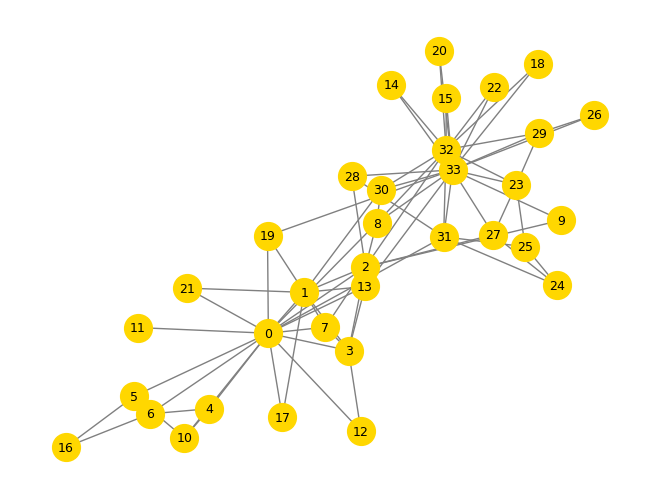

In [90]:
# Load the graph
ZKC_g= nx.karate_club_graph()

# Plot the graph
nx.draw(ZKC_g, 
        node_color='gold', 
        with_labels=True, 
        node_size=400,
        font_color="black",
        edge_color='gray',
         font_size=9,
       )

Text(0.5, 1.0, 'Degree Histogram')

<Figure size 1200x800 with 0 Axes>

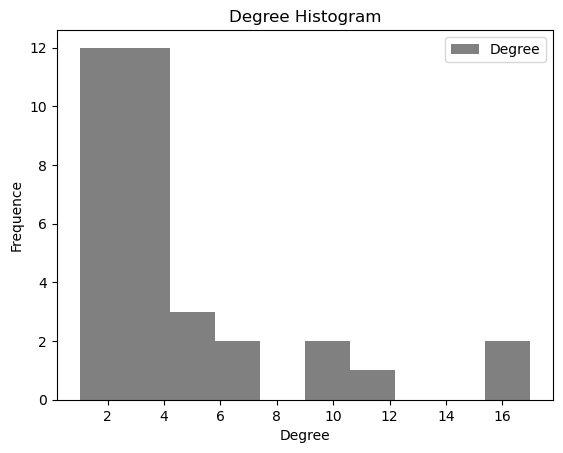

In [91]:
import pandas as pd

# We can plot the histogram of the degrees:
ZKC_degree=nx.degree(ZKC_g)

df=pd.DataFrame(list(ZKC_degree),columns=['Node','Degree']).set_index('Node')


plt.figure(figsize=(12, 8))

df.plot(kind='hist',color='gray')
plt.ylabel("Frequence")
plt.xlabel("Degree")
plt.title("Degree Histogram")

### Padgett's Florentine families graph: 

In [1]:
# Load the graph
FF_g= nx.florentine_families_graph()

# Plot the graph
nx.draw(FF_g, 
        node_color='gold', 
        with_labels=True, 
        node_size=400,
        font_color="black",
        edge_color='gray',
         font_size=12,
       )

NameError: name 'nx' is not defined

In [93]:
list(FF_g.edges)

[('Acciaiuoli', 'Medici'),
 ('Medici', 'Barbadori'),
 ('Medici', 'Ridolfi'),
 ('Medici', 'Tornabuoni'),
 ('Medici', 'Albizzi'),
 ('Medici', 'Salviati'),
 ('Castellani', 'Peruzzi'),
 ('Castellani', 'Strozzi'),
 ('Castellani', 'Barbadori'),
 ('Peruzzi', 'Strozzi'),
 ('Peruzzi', 'Bischeri'),
 ('Strozzi', 'Ridolfi'),
 ('Strozzi', 'Bischeri'),
 ('Ridolfi', 'Tornabuoni'),
 ('Tornabuoni', 'Guadagni'),
 ('Albizzi', 'Ginori'),
 ('Albizzi', 'Guadagni'),
 ('Salviati', 'Pazzi'),
 ('Bischeri', 'Guadagni'),
 ('Guadagni', 'Lamberteschi')]

Text(0.5, 1.0, 'Degree Histogram')

<Figure size 1200x800 with 0 Axes>

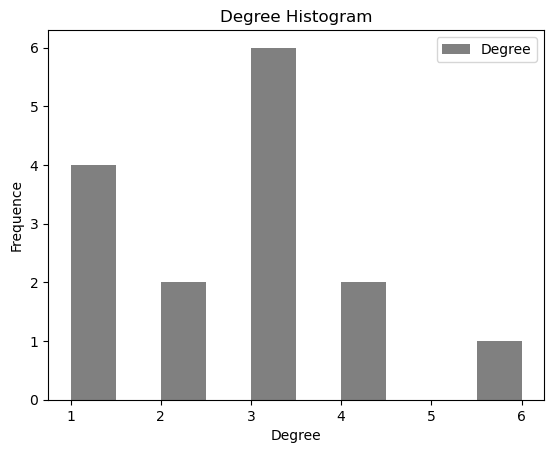

In [94]:
# We can plot the histogram of the degrees:
FF_degree=nx.degree(FF_g)

df=pd.DataFrame(list(FF_degree),columns=['Node','Degree']).set_index('Node')


plt.figure(figsize=(12, 8))

df.plot(kind='hist',color='gray')
plt.ylabel("Frequence")
plt.xlabel("Degree")
plt.title("Degree Histogram")

__References:__

[1] NetworkX Reference: https://networkx.org/documentation/latest/_downloads/networkx_reference.pdf
        
[2] Graph generators: https://networkx.org/documentation/stable/reference/generators.html